In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
warnings.simplefilter('ignore')
%matplotlib inline

In [265]:
company = pd.read_csv('company_hierarchy.csv')
company.head()

,employee_id,boss_id,dept
0,46456,175361.0,sales
1,104708,29733.0,HR
2,120853,41991.0,sales
3,142630,171266.0,HR
4,72711,198240.0,sales


In [266]:
employee = pd.read_csv('employee.csv')
employee.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience
0,138719,0,273000.0,Master,M,2
1,3192,0,301000.0,Bachelor,F,1
2,114657,0,261000.0,Master,F,2
3,29039,0,86000.0,High_School,F,4
4,118607,0,126000.0,Bachelor,F,3


In [267]:
company.isnull().sum()

employee_id    0
boss_id        1
dept           0
dtype: int64

In [268]:
employee.isnull().sum()

employee_id       0
signing_bonus     0
salary            0
degree_level      0
sex               0
yrs_experience    0
dtype: int64

In [269]:
data = pd.merge(left=employee, right=company, on='employee_id')
data.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept
0,138719,0,273000.0,Master,M,2,43602.0,engineering
1,3192,0,301000.0,Bachelor,F,1,87847.0,sales
2,114657,0,261000.0,Master,F,2,180854.0,sales
3,29039,0,86000.0,High_School,F,4,88370.0,HR
4,118607,0,126000.0,Bachelor,F,3,23565.0,sales


# Q1
In the company there are 6 levels (described below). Identify, for each employee, her corresponding level.

Individual Contributors (IC) - they don't manage anyone

Middle Managers (MM) - they are the direct bosses of IC

Directors (D) - they are the direct bosses of MM

VP - D direct bosses

Executives (E) - VP direct bosses

CEO - The direct boss of E.

In [270]:
data.loc[data['dept'] == 'CEO', 'level'] = 'CEO'

levels = ['E', 'VP', 'D', 'MM', 'IC']

for i in range(len(levels)):
    level = levels[i]
    if level == 'E':
        boss = 'CEO'
    else:
        boss = levels[i-1]
    boss_ids = data[data['level'] == boss]['employee_id']
    mask = data['boss_id'].isin(boss_ids)
    data.loc[mask, 'level'] = level

In [271]:
data[['employee_id', 'level']].sample(10)

,employee_id,level
8907,159939,IC
4436,53608,IC
9268,164657,IC
4863,197082,IC
6122,67053,IC
959,13707,IC
467,161265,IC
3675,52383,IC
4158,41830,IC
9932,181733,IC


# Q2 
How many people each employee manages? You should have a table with employee ids
and the number of people managed. Consider that if John directly manages 2 people and
these two people manage 5 people each, then we conclude that John manages 12
people.

In [272]:
data['counts'] = 0

for level in ['IC', 'MM', 'D', 'VP', 'E']:
    boss_ids = data[data['level'] == level]['boss_id']
    employee_ids = data[data['level'] == level]['employee_id']
    for b_id, e_id in zip(boss_ids, employee_ids):
        e_counts = int(1 + data.loc[data['employee_id'] == e_id, 'counts'])
        b_counts = int(data.loc[data['employee_id'] == b_id, 'counts'])
        data.loc[data['employee_id'] == b_id, 'counts'] = e_counts + b_counts

In [273]:
data[['employee_id', 'level', 'counts']].sample(10)

,employee_id,level,counts
9608,102304,IC,0
1708,170804,IC,0
8162,109452,IC,0
1404,119558,IC,0
582,16446,IC,0
9155,168526,IC,0
8100,146251,IC,0
1044,85918,IC,0
5016,59062,IC,0
3241,158660,IC,0


# Q3
Build a model to predict the salary of each employee.

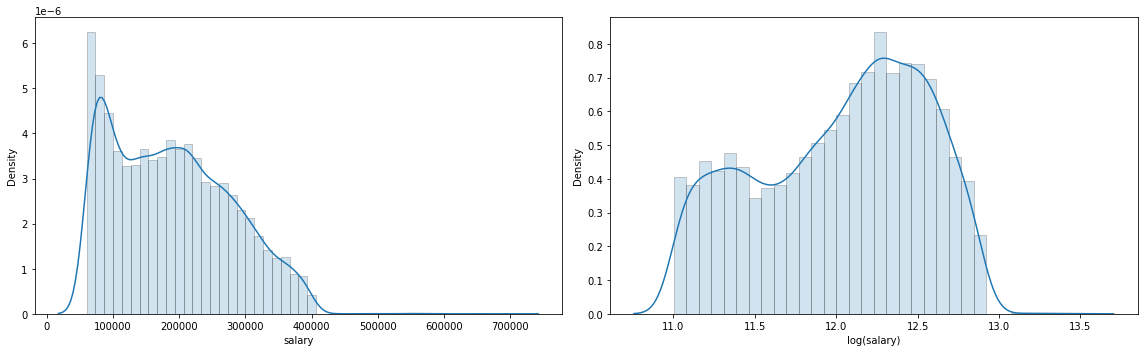

In [274]:
warnings.filterwarnings('ignore')
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.distplot(data['salary'], ax=ax[0], hist_kws=hist_kws)
sns.distplot(np.log(data['salary']), ax=ax[1], hist_kws=hist_kws)
ax[1].set_xlabel('log(salary)')
plt.tight_layout()
plt.show()

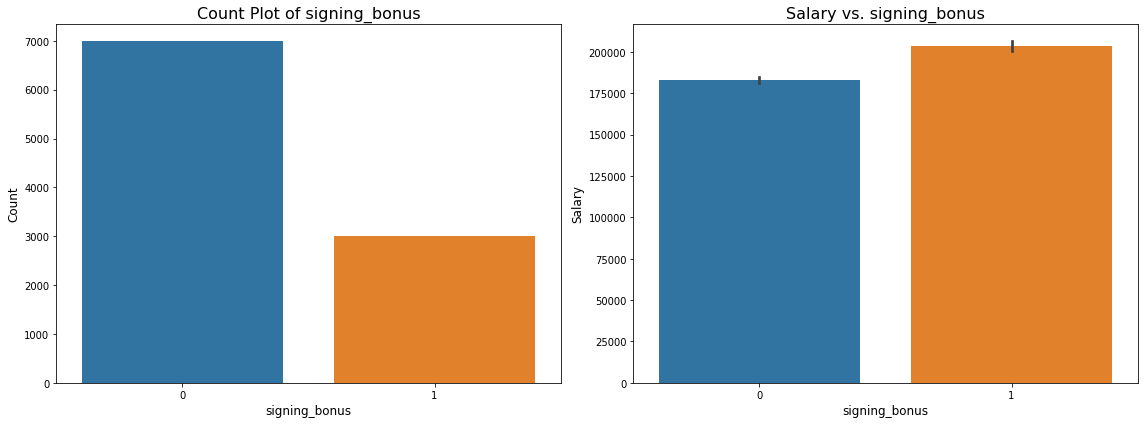

In [275]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='signing_bonus', data=data, ax=ax[0])
ax[0].set_xlabel('signing_bonus', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of signing_bonus', fontsize=16)

sns.barplot(x='signing_bonus', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('signing_bonus', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. signing_bonus', fontsize=16)
plt.tight_layout()
plt.show()

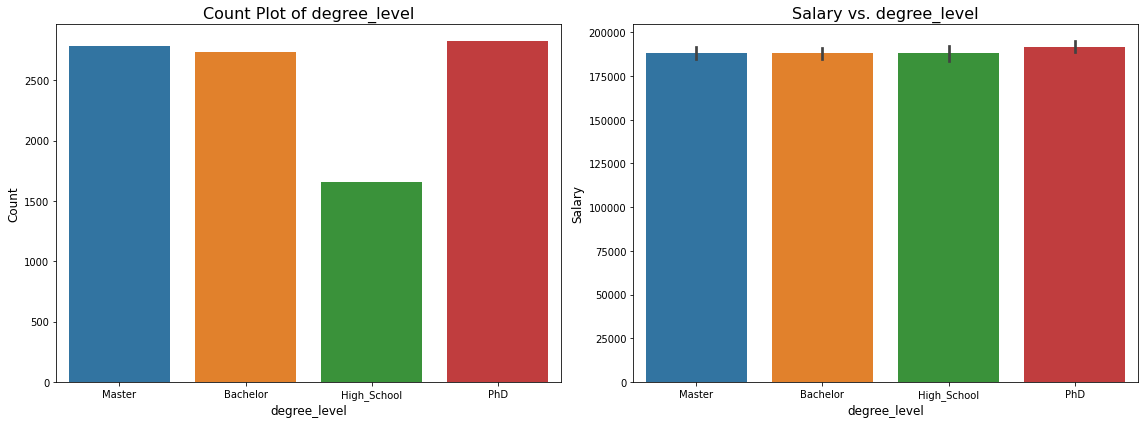

In [276]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='degree_level', data=data, ax=ax[0])
ax[0].set_xlabel('degree_level', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of degree_level', fontsize=16)

sns.barplot(x='degree_level', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('degree_level', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. degree_level', fontsize=16)
plt.tight_layout()
plt.show()

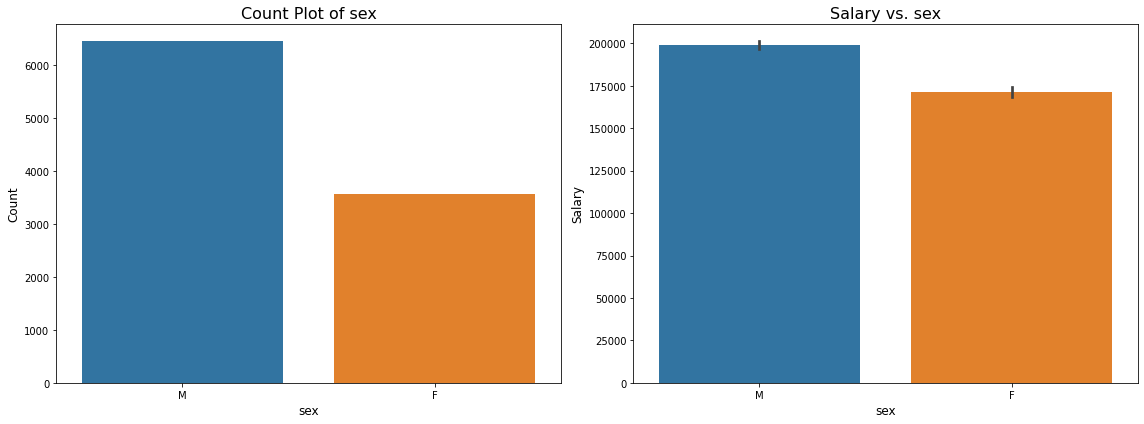

In [277]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='sex', data=data, ax=ax[0])
ax[0].set_xlabel('sex', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of sex', fontsize=16)

sns.barplot(x='sex', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('sex', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. sex', fontsize=16)
plt.tight_layout()
plt.show()

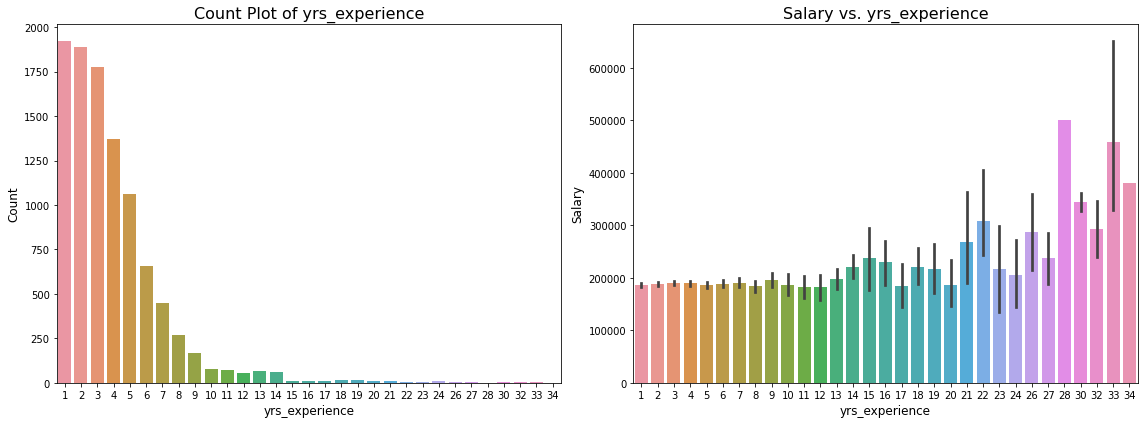

In [278]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='yrs_experience', data=data, ax=ax[0])
ax[0].set_xlabel('yrs_experience', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of yrs_experience', fontsize=16)

sns.barplot(x='yrs_experience', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('yrs_experience', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. yrs_experience', fontsize=16)
plt.tight_layout()
plt.show()

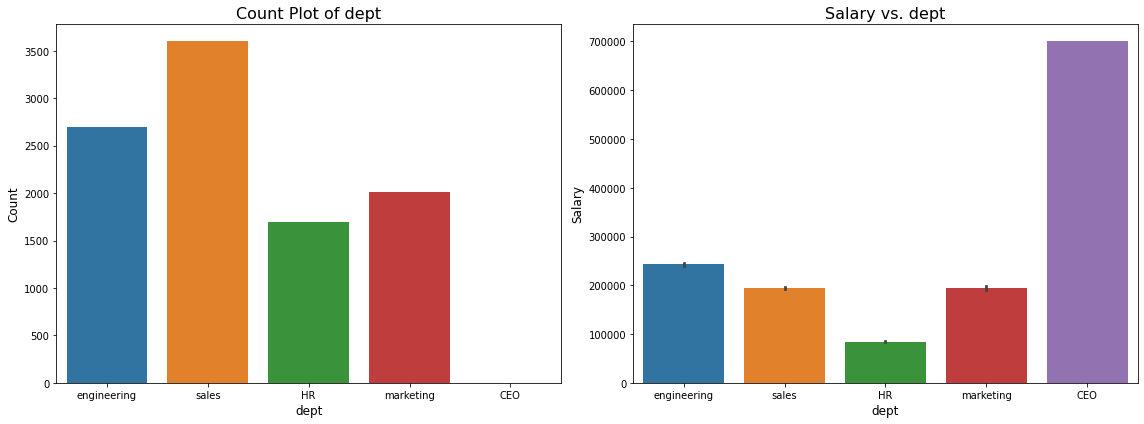

In [279]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='dept', data=data, ax=ax[0])
ax[0].set_xlabel('dept', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of dept', fontsize=16)

sns.barplot(x='dept', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('dept', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. dept', fontsize=16)
plt.tight_layout()
plt.show()

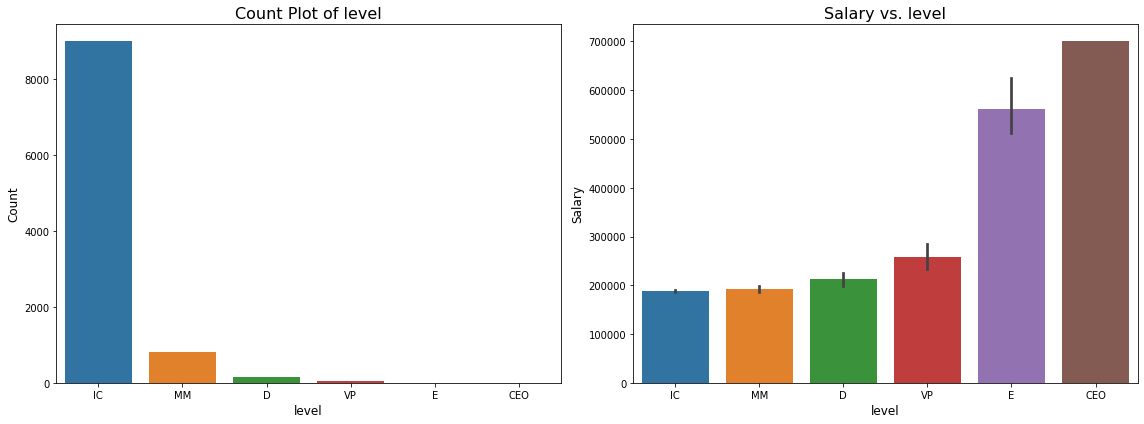

In [280]:
orders = ['IC', 'MM', 'D', 'VP', 'E', 'CEO']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='level', data=data, ax=ax[0], order=orders)
ax[0].set_xlabel('level', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of level', fontsize=16)

sns.barplot(x='level', y='salary', data=data, ax=ax[1], order=orders)
ax[1].set_xlabel('level', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. level', fontsize=16)
plt.tight_layout()
plt.show()

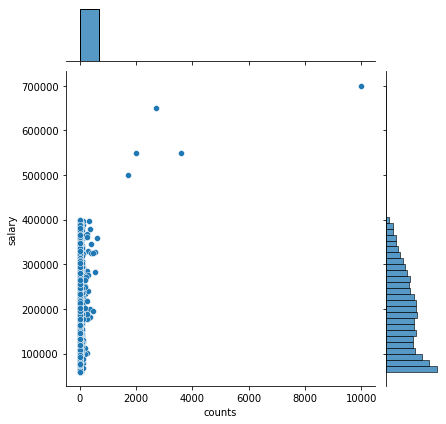

In [281]:
sns.jointplot(x='counts', y='salary', data=data, kind='scatter', size=6)
plt.show()

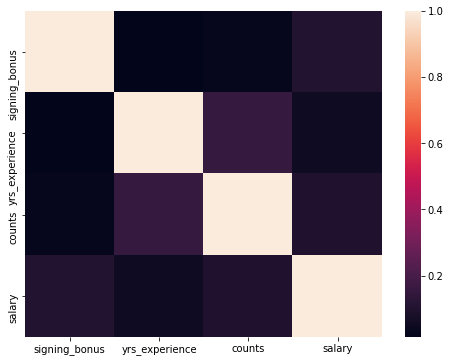

In [282]:
fig, ax = plt.subplots(figsize=(8, 6))
subset = data[['signing_bonus', 'yrs_experience', 'counts', 'salary']]
sns.heatmap(subset.corr(), ax=ax)
plt.show()

In [283]:
data = data[data['dept'] != 'CEO']
data = data.drop(labels = ['employee_id','boss_id', 'level', 'counts'], axis = 1)

In [284]:
le = LabelEncoder()
data['degree_level'] = le.fit_transform(data['degree_level'])
data['sex'] = le.fit_transform(data['sex'])
data['dept'] = le.fit_transform(data['dept'])

In [285]:
X = data.loc[:, data.columns!='salary']
y = data['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [286]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [292]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.006

# Q4
Describe the main factors impacting employee salaries. Do you think the company has
been treating its employees fairly? Do you see any bias? What are the next steps you
would suggest to the Head of HR?

In [313]:
features = data.columns
features = list(features)
features.remove('salary')
feature_importances = pd.DataFrame(rf.feature_importances_, index = features,columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [322]:
feature_importances = feature_importances.reset_index()

<AxesSubplot:xlabel='index', ylabel='importance'>

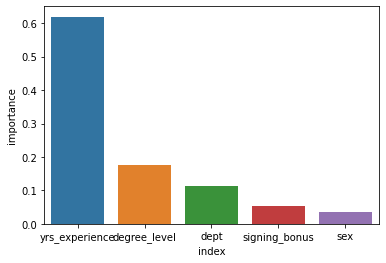

In [323]:
sns.barplot(x='index', y = 'importance', data=feature_importances)

Yrs of experience is the most important factor when hiring people for HR

From the visualization, we could observe that the employer treats employee fair. Except that the CEO or the management level has been overpaid a lot.